# Correlation length analysis

In [1]:
%pylab inline

from pathlib import Path

import h5py
import numpy as np
from isingchat import style
from isingchat.io import read_ising_config
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure
from ruamel.yaml import YAML
from scipy import interpolate as interp
from scipy.signal import savgol_filter
import pandas as pd
import json

import os
import re

yaml = YAML()

Populating the interactive namespace from numpy and matplotlib


## Ploting correlation length for one p for different nv

(0.0, 20.0)

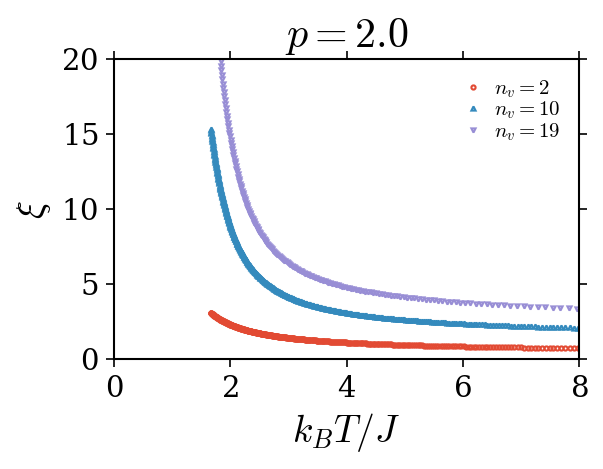

In [18]:
data_path = Path('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\isingchat\\data\\cor_length\\regular\\infinite-size\\centrosym')

nvs = [
    2,
#        3,
#        4,
#        5,
#        6,
#        7,
#        8,
#        9,
       10,
#        11,
#        12,
#        13,
#        14,
#        15,
#        16,
#        17,
#        18,
       19,
#        20
]
p = 2.0
# ps = [1.0]

# Plot settings
use_tex = False
#
markers = ["o",
           "^",
           "v",
           "s",
           "P",
           "*",
           "p",
           "h",
           "D",
           "X",
           "8",
           "d"]
#
line_styles = ["solid",
               "dotted",
               "dashed",
               "dashdot",
               (0,(1,1)),
               (0,(5,1)),
               (0,(3,1,1,1)),
               (0,(3,1,1,1,1,1)), 
               (0,(3,1,3,1,1,1)),
               (0,(5,1,3,1,1,1)),
               (0,(6,1,4,1,2,1)),
               (0,(1,10)),
               (0,(5,10)),
               (0,(3,10,1,10))]

# Load the default style.
style.use("default")
rcParams["text.usetex"] = use_tex

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

ax: Axes = fig1.add_subplot(grid_spec[0, 0])

# for index, p in enumerate(ps):
for index,nv in enumerate(nvs):

    file = 'p_{}\\p-{}_nv-{}_h-0_inv-temp.yml'.format(p,p,nv)
    config_file = Path(os.path.join(data_path,file)).resolve()
    cor_length_file = config_file.with_suffix(".cor-length.h5")
#     print(file)
#     print(cor_length_file)

    with config_file.open() as cfp:
        config_info = yaml.load(cfp)
    config_data = read_ising_config(config_info)

    with h5py.File(str(cor_length_file)) as h5fp:
        cor_length = h5fp["correlation-length"][:]

    with config_file.open() as cfp:
        config_info = yaml.load(cfp)
    config_data = read_ising_config(config_info)

    temp = config_data["system"]["inv_temperature"]
    mag_field = config_data["system"]["magnetic_field"]

#     ax.plot(temp, cor_length[:,0], lw=1.5,marker='o')  
    ax.plot(1/temp, cor_length, 
                marker=markers[index],
                markersize=2,
                mfc='none',
                lw=0,
                linestyle=line_styles[index],
                color='C{}'.format(index),
                label='$n_v={}$'.format(nv)
               )

#     ax.semilogy(1/temp, cor_length, 
#                 marker=markers[index],
#                 markersize=2,
#                 mfc='none',
#                 lw=0,
#                 linestyle=line_styles[index],
#                 color='C{}'.format(index),
#                 label='$p={}$'.format(p)
#                )

# cor_length_interp = interp.UnivariateSpline(temp,
#                                            cor_length[:, 0],
#                                            s=0, k=4)

# temp_fine = np.linspace(temp.min(), temp.max(), 2048)
# cor_length_fine = cor_length_interp(temp_fine)

# # Specific heat subplot.
# ax: Axes = fig1.add_subplot(grid_spec[0, 0])

# ax.plot(temp_fine, cor_length_fine, lw=1.5)

# # Set major ticks for x axis
# major_xticks = np.arange(0, 0.6, 0.1)

# # I want minor ticks for x axis
# minor_xticks = np.arange(0, 0.6, 0.05)

# # Set major ticks for y axis
# major_yticks = np.arange(0, 1, 0.2)

# # I want minor ticks for y axis
# minor_yticks = np.arange(0, 1, 0.05)

# # ticks configuration
# ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
# ax.xaxis.set_minor_locator(plt.MultipleLocator(0.025))
# for tick in ax.xaxis.get_major_ticks():
#     tick.label.set_fontsize(14) 

# ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(0.05))
# for tick in ax.yaxis.get_major_ticks():
#     tick.label.set_fontsize(14) 

# set legends configurations
ax.legend(
          loc ="upper right",
          fontsize = 10,
#           ncol = 2,
          columnspacing = 0.2,
          labelspacing = 0,
          handletextpad=0,
          frameon=False
        )

# ax.axvline(2.361,color='C1')
# ax.axvline(2.732,color='C2')

# labels configurations
ax.xaxis.label.set_size(18)
# ax.set_xlabel(r"$\beta J$")
ax.set_xlabel(r"$k_BT/J$")

ax.set_ylabel(r"$\xi$")

ax.set_title(r"$p={}$".format(p))
# ax.set_title(r"$n_v={}$".format(nv))

ax.set_xlim(0,8)
ax.set_ylim(0,20)


Text(0.5, 1.0, '$p=1.0$')

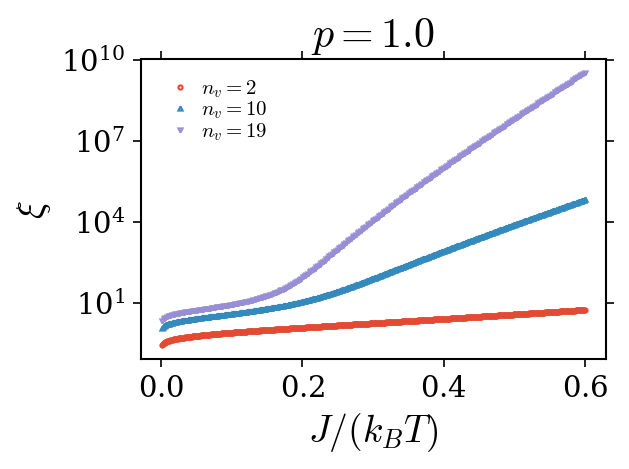

In [11]:
data_path = Path('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\isingchat\\data\\cor_length\\regular\\infinite-size\\centrosym')

nvs = [
    2,
#        3,
#        4,
#        5,
#        6,
#        7,
#        8,
#        9,
       10,
#        11,
#        12,
#        13,
#        14,
#        15,
#        16,
#        17,
#        18,
       19,
#        20
]
p = 1.0
# ps = [1.0]

# Plot settings
use_tex = False
#
markers = ["o",
           "^",
           "v",
           "s",
           "P",
           "*",
           "p",
           "h",
           "D",
           "X",
           "8",
           "d"]
#
line_styles = ["solid",
               "dotted",
               "dashed",
               "dashdot",
               (0,(1,1)),
               (0,(5,1)),
               (0,(3,1,1,1)),
               (0,(3,1,1,1,1,1)), 
               (0,(3,1,3,1,1,1)),
               (0,(5,1,3,1,1,1)),
               (0,(6,1,4,1,2,1)),
               (0,(1,10)),
               (0,(5,10)),
               (0,(3,10,1,10))]

# Load the default style.
style.use("default")
rcParams["text.usetex"] = use_tex

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

ax: Axes = fig1.add_subplot(grid_spec[0, 0])

# for index, p in enumerate(ps):
for index,nv in enumerate(nvs):

    file = 'p_{}\\p-{}_nv-{}_h-0_inv-temp.yml'.format(p,p,nv)
    config_file = Path(os.path.join(data_path,file)).resolve()
    cor_length_file = config_file.with_suffix(".cor-length.h5")
#     print(file)
#     print(cor_length_file)

    with config_file.open() as cfp:
        config_info = yaml.load(cfp)
    config_data = read_ising_config(config_info)

    with h5py.File(str(cor_length_file)) as h5fp:
        cor_length = h5fp["correlation-length"][:]

    with config_file.open() as cfp:
        config_info = yaml.load(cfp)
    config_data = read_ising_config(config_info)

    temp = config_data["system"]["inv_temperature"]
    mag_field = config_data["system"]["magnetic_field"]

#     ax.plot(temp, cor_length[:,0], lw=1.5,marker='o')  
#     ax.plot(temp, cor_length, 
#                 marker=markers[index],
#                 markersize=2,
#                 mfc='none',
#                 lw=0,
#                 linestyle=line_styles[index],
#                 color='C{}'.format(index),
#                 label='$n_v={}$'.format(nv)
#                )

    ax.semilogy(temp, cor_length, 
                marker=markers[index],
                markersize=2,
                mfc='none',
                lw=0,
                linestyle=line_styles[index],
                color='C{}'.format(index),
                label='$n_v={}$'.format(nv)
               )

# cor_length_interp = interp.UnivariateSpline(temp,
#                                            cor_length[:, 0],
#                                            s=0, k=4)

# temp_fine = np.linspace(temp.min(), temp.max(), 2048)
# cor_length_fine = cor_length_interp(temp_fine)

# # Specific heat subplot.
# ax: Axes = fig1.add_subplot(grid_spec[0, 0])

# ax.plot(temp_fine, cor_length_fine, lw=1.5)

# # Set major ticks for x axis
# major_xticks = np.arange(0, 0.6, 0.1)

# # I want minor ticks for x axis
# minor_xticks = np.arange(0, 0.6, 0.05)

# # Set major ticks for y axis
# major_yticks = np.arange(0, 1, 0.2)

# # I want minor ticks for y axis
# minor_yticks = np.arange(0, 1, 0.05)

# # ticks configuration
# ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
# ax.xaxis.set_minor_locator(plt.MultipleLocator(0.025))
# for tick in ax.xaxis.get_major_ticks():
#     tick.label.set_fontsize(14) 

# ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(0.05))
# for tick in ax.yaxis.get_major_ticks():
#     tick.label.set_fontsize(14) 

# set legends configurations
ax.legend(
          loc ="upper left",
          fontsize = 10,
#           ncol = 2,
          columnspacing = 0.2,
          labelspacing = 0,
          handletextpad=0,
          frameon=False
        )

# ax.axvline(2.361,color='C1')
# ax.axvline(2.732,color='C2')

# labels configurations
ax.xaxis.label.set_size(18)
# ax.set_xlabel(r"$\beta J$")
ax.set_xlabel(r"$J/(k_BT)$")

ax.set_ylabel(r"$\xi$")

ax.set_title(r"$p={}$".format(p))
# ax.set_title(r"$n_v={}$".format(nv))

# ax.set_xlim(0,8)
# ax.set_ylim(0,60)


## 1/ $\xi$

1
1


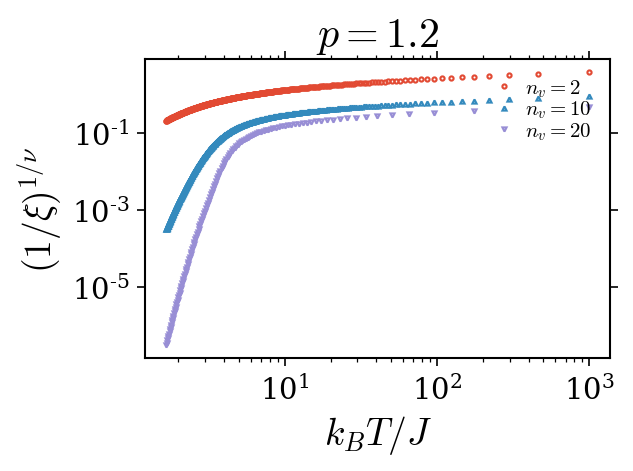

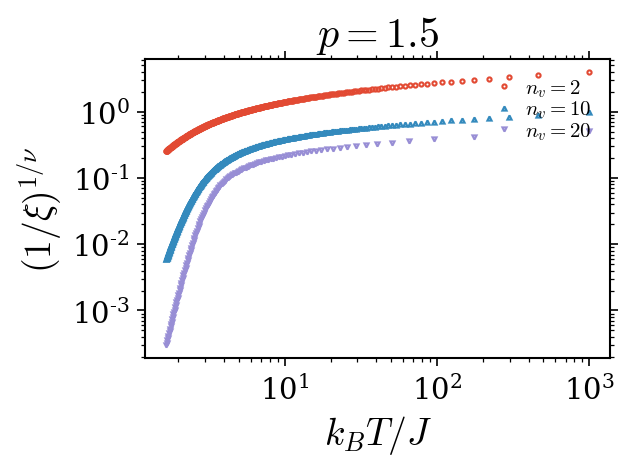

In [14]:
data_path = Path('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\isingchat\\data\\cor_length\\regular\\infinite-size\\centrosym')
exp_nu = 1
nvs = [
    2,
#        3,
#        4,
#        5,
#        6,
#        7,
#        8,
#        9,
       10,
#        11,
#        12,
#        13,
#        14,
#        15,
#        16,
#        17,
#        18,
#        19,
       20
]
# p = 1.5
ps = [1.2,1.5]

# Plot settings
use_tex = False
#
markers = ["o",
           "^",
           "v",
           "s",
           "P",
           "*",
           "p",
           "h",
           "D",
           "X",
           "8",
           "d"]
#
line_styles = ["solid",
               "dotted",
               "dashed",
               "dashdot",
               (0,(1,1)),
               (0,(5,1)),
               (0,(3,1,1,1)),
               (0,(3,1,1,1,1,1)), 
               (0,(3,1,3,1,1,1)),
               (0,(5,1,3,1,1,1)),
               (0,(6,1,4,1,2,1)),
               (0,(1,10)),
               (0,(5,10)),
               (0,(3,10,1,10))]


for index, p in enumerate(ps):
    # Load the default style.
    style.use("default")
    rcParams["text.usetex"] = use_tex

    fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
    grid_spec = GridSpec(3, 1)

    ax: Axes = fig1.add_subplot(grid_spec[0, 0])

    for index,nv in enumerate(nvs):

        file = 'p_{}\\p-{}_nv-{}_h-0_inv-temp.yml'.format(p,p,nv)
        config_file = Path(os.path.join(data_path,file)).resolve()
        cor_length_file = config_file.with_suffix(".cor-length.h5")
    #     print(file)
    #     print(cor_length_file)

        with config_file.open() as cfp:
            config_info = yaml.load(cfp)
        config_data = read_ising_config(config_info)

        with h5py.File(str(cor_length_file)) as h5fp:
            cor_length = h5fp["correlation-length"][:]

        with config_file.open() as cfp:
            config_info = yaml.load(cfp)
        config_data = read_ising_config(config_info)

        temp = config_data["system"]["inv_temperature"]
        mag_field = config_data["system"]["magnetic_field"]

    #     ax.plot(temp, cor_length[:,0], lw=1.5,marker='o')  
    #     ax.plot(1/temp, (1/cor_length)**(1/exp_nu), 
    #                 marker=markers[index],
    #                 markersize=2,
    #                 mfc='none',
    #                 lw=0,
    #                 linestyle=line_styles[index],
    #                 color='C{}'.format(index),
    #                 label='$n_v={}$'.format(nv)
    #                )
        ax.loglog(1/temp, (1/cor_length)**(1/exp_nu), 
                    marker=markers[index],
                    markersize=2,
                    mfc='none',
                    lw=0,
                    linestyle=line_styles[index],
                    color='C{}'.format(index),
                    label='$n_v={}$'.format(nv)
                   )

    # cor_length_interp = interp.UnivariateSpline(temp,
    #                                            cor_length[:, 0],
    #                                            s=0, k=4)

    # temp_fine = np.linspace(temp.min(), temp.max(), 2048)
    # cor_length_fine = cor_length_interp(temp_fine)

    # # Specific heat subplot.
    # ax: Axes = fig1.add_subplot(grid_spec[0, 0])

    # ax.plot(temp_fine, cor_length_fine, lw=1.5)

    # # Set major ticks for x axis
    # major_xticks = np.arange(0, 0.6, 0.1)

    # # I want minor ticks for x axis
    # minor_xticks = np.arange(0, 0.6, 0.05)

    # # Set major ticks for y axis
    # major_yticks = np.arange(0, 1, 0.2)

    # # I want minor ticks for y axis
    # minor_yticks = np.arange(0, 1, 0.05)

    # # ticks configuration
    # ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
    # ax.xaxis.set_minor_locator(plt.MultipleLocator(0.025))
    # for tick in ax.xaxis.get_major_ticks():
    #     tick.label.set_fontsize(14) 

    # ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
    # ax.yaxis.set_minor_locator(plt.MultipleLocator(0.05))
    # for tick in ax.yaxis.get_major_ticks():
    #     tick.label.set_fontsize(14) 

    # set legends configurations
    ax.legend(
              loc ="upper right",
              fontsize = 10,
    #           ncol = 2,
              columnspacing = 0.2,
              labelspacing = 0,
              handletextpad=0,
              frameon=False
            )

    # ax.axvline(2.361,color='C1')
    # ax.axvline(2.732,color='C2')
    # x_range = np.arange(0,20,0.1)
    # ax.plot(x_range,(1/9)*x_range-1,color='C6')


    # labels configurations
    ax.xaxis.label.set_size(18)
    # ax.set_xlabel(r"$\beta J$")
    ax.set_xlabel(r"$k_BT/J$")

    ax.set_ylabel(r"$(1/\xi)^{1/\nu}$")

    ax.set_title(r"$p={}$".format(p))
    # ax.set_title(r"$n_v={}$".format(nv))

#     ax.set_xlim(0,20)
    # ax.set_ylim(0,0.05)

    print(exp_nu)

(-20.0, 0.0)

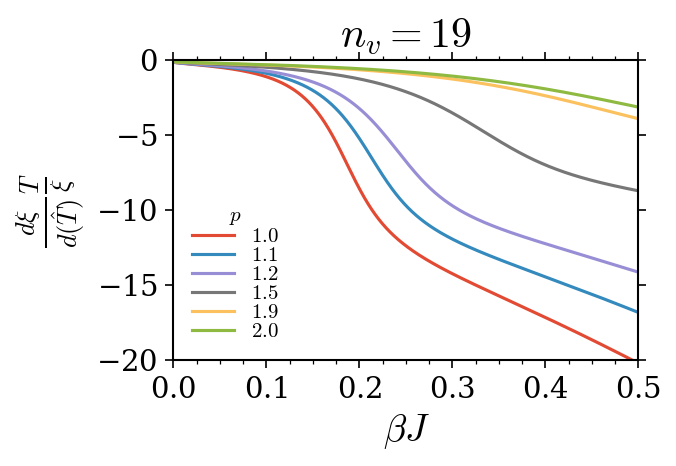

In [12]:
# p=1.5
ps=[1.0,1.1,1.2,1.5,1.9,2.0]
# nvs=[20,17,14,2]
nvs=[19]

# Load the default style.
style.use("default")
rcParams["text.usetex"] = use_tex

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

ax: Axes = fig1.add_subplot(grid_spec[0, 0])

for p in ps:
    for nv in nvs:
        file = 'p_{}\\p-{}_nv-{}_h-0_inv-temp.yml'.format(p,p,nv)
        config_file = Path(os.path.join(data_path,file)).resolve()
        cor_length_file = config_file.with_suffix(".cor-length.h5")

        with config_file.open() as cfp:
            config_info = yaml.load(cfp)
        config_data = read_ising_config(config_info)

        with h5py.File(str(cor_length_file)) as h5fp:
            cor_length = h5fp["correlation-length"][:]

        with config_file.open() as cfp:
            config_info = yaml.load(cfp)
        config_data = read_ising_config(config_info)

        inv_temp = config_data["system"]["inv_temperature"]
        mag_field = config_data["system"]["magnetic_field"]

        cor_length_interp = interp.UnivariateSpline(inv_temp,
                                                   cor_length[:, 0],
                                                   s=0, k=4)

        # First derivative of the correlation length.
        cor_length_der = cor_length_interp.derivative(n=1)

        inv_temp_fine = np.linspace(inv_temp.min(), inv_temp.max(), 2048)
        cor_length_der_fine = cor_length_der(inv_temp_fine)
        cor_length_log_der = (cor_length_der(inv_temp_fine)/cor_length_interp(inv_temp_fine))*(-inv_temp_fine)

        # ax.plot(inv_temp_fine, cor_length_der_fine, lw=1.5)
        # ax.semilogy(inv_temp_fine, cor_length_der_fine, lw=1.5)

        ax.plot(inv_temp_fine, cor_length_log_der, lw=1.5,label='${}$'.format(p))
        # ax.semilogy(inv_temp_fine, cor_length_log_der, lw=1.5)


# Set major ticks for x axis
major_xticks = np.arange(0, 0.6, 0.1)

# I want minor ticks for x axis
minor_xticks = np.arange(0, 0.6, 0.05)

# # Set major ticks for y axis
# major_yticks = np.arange(0, 1, 0.2)

# # I want minor ticks for y axis
# minor_yticks = np.arange(0, 1, 0.05)

# ticks configuration
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.025))
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

# ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(0.05))
# for tick in ax.yaxis.get_major_ticks():
#     tick.label.set_fontsize(14) 

# labels configurations
ax.xaxis.label.set_size(18)
ax.set_xlabel(r"$\beta J$")

ax.set_ylabel(r"$\frac{d\xi}{d(\hat{T})}\frac{T}{\xi}$")

# ax.set_title(r"$p={}$".format(p))
ax.set_title(r"$n_v={}$".format(nv))

ax.legend(
        title = "$p$",
        title_fontsize = 10,
        loc ="lower left",
        fontsize = 10,
        labelspacing=0,
        frameon = False
             )

ax.set_xlim(0,0.5)

ax.set_ylim(-20,0)

p-1.0_nv-2_h-0_inv-temp.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\data\test\p-1.0_nv-2_h-0_inv-temp.cor-length.h5


Text(0, 0.5, '$\\xi$')

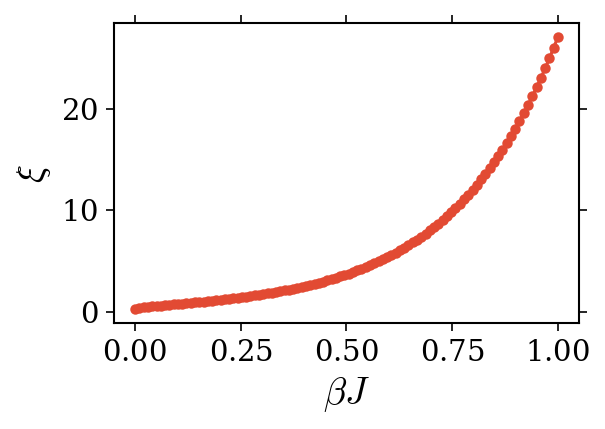

In [41]:
data_path = Path('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\isingchat\\data\\test')
nv = 2
p = 1.0
file = 'p-{}_nv-{}_h-0_inv-temp.yml'.format(p,nv)
config_file = Path(os.path.join(data_path,file)).resolve()
energy_file = config_file.with_suffix(".cor-length.h5")
print(file)
print(energy_file)

# Plot settings
use_tex = False

# Load the default style.
style.use("default")
rcParams["text.usetex"] = use_tex

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

with config_file.open() as cfp:
    config_info = yaml.load(cfp)
config_data = read_ising_config(config_info)

with h5py.File(str(energy_file)) as h5fp:
    cor_length = h5fp["correlation-length"][:]

with config_file.open() as cfp:
    config_info = yaml.load(cfp)
config_data = read_ising_config(config_info)

temp = config_data["system"]["inv_temperature"]
mag_field = config_data["system"]["magnetic_field"]

ax: Axes = fig1.add_subplot(grid_spec[0, 0])

ax.plot(temp, cor_length[:,0], lw=1.5,marker='o')


# cor_length_interp = interp.UnivariateSpline(temp,
#                                            cor_length[:, 0],
#                                            s=0, k=4)

# temp_fine = np.linspace(temp.min(), temp.max(), 2048)
# cor_length_fine = cor_length_interp(temp_fine)

# # Specific heat subplot.
# ax: Axes = fig1.add_subplot(grid_spec[0, 0])

# ax.plot(temp_fine, cor_length_fine, lw=1.5)

ax.set_xlabel(r"$\beta J$")
ax.set_ylabel(r"$\xi$")